# <font color=blue>Case Studies in Statistical Thinking</font> 

Mastery requires practice. Having completed Statistical Thinking I and II, you developed your probabilistic mindset and the hacker stats skills to extract actionable insights from your data. Your foundation is in place, and now it is time practice your craft. In this course, you will apply your statistical thinking skills, exploratory data analysis, parameter estimation, and hypothesis testing, to two new real-world data sets. First, you will explore data from the 2013 and 2015 FINA World Aquatics Championships, where you will quantify the relative speeds and variability among swimmers. You will then perform a statistical analysis to assess the "current controversy" of the 2013 Worlds in which swimmers claimed that a slight current in the pool was affecting result. Second, you will study the frequency and magnitudes of earthquakes around the world. Finally, you will analyze the changes in seismicity in the US state of Oklahoma after the practice of high pressure waste water injection at oil extraction sites became commonplace in the last decade. As you work with these data sets, you will take vital steps toward mastery as you cement your existing knowledge and broaden your abilities to use statistics and Python to make sense of your data.

In [1]:
import pandas as pd
import dc_stat_think as dcst
import matplotlib.pyplot as plt
import numpy as np

## <font color=red>01 -  Fish sleep and bacteria growth: A review of Statistical Thinking I and II </font> 
To begin, you'll use two data sets from Caltech researchers to rehash the key points of Statistical Thinking I and II to prepare you for the following case studies! 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">EDA: Plot ECDFs of active bout length</h1><p>An active bout is a stretch of time where a fish is constantly moving. Plot an ECDF of active bout length for the mutant and wild type fish for the seventh night of their lives. The data sets are in the <code>numpy</code> arrays <code>bout_lengths_wt</code> and <code>bout_lengths_mut</code>. The bout lengths are in units of minutes.</p></div>

In [2]:
zebrafish = pd.read_csv('./data/gandhi_et_al_bouts.csv', skiprows=4)
bout_lengths_wt = zebrafish[zebrafish['genotype']=='wt']['bout_length'].values
bout_lengths_mut = zebrafish[zebrafish['genotype']=='mut']['bout_length'].values
bout_lengths_het = zebrafish[zebrafish['genotype']=='het']['bout_length'].values

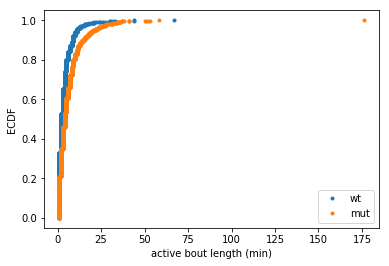

In [3]:
# Import the dc_stat_think module as dcst
import dc_stat_think as dcst

# Generate x and y values for plotting ECDFs
x_wt, y_wt = dcst.ecdf(bout_lengths_wt)
x_mut, y_mut = dcst.ecdf(bout_lengths_mut)

# Plot the ECDFs
_ = plt.plot(x_wt, y_wt, marker='.', linestyle='none')
_ = plt.plot(x_mut, y_mut, marker='.', linestyle='none')

# Make a legend, label axes, and show plot
_ = plt.legend(('wt', 'mut'))
_ = plt.xlabel('active bout length (min)')
_ = plt.ylabel('ECDF')
plt.show()

There is an outlier of one active bout for a mutant fish, and the ECDF exposes this clearly. It is important to know about, but we will not focus on it going forward, though.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Interpreting ECDFs and the story</h1><p>While a more detailed analysis of distributions is often warranted for careful analyses, you can already get a feel for the distributions and the story behind the data by eyeballing the ECDFs. Which of the following would be the most reasonable statement to make about how the active bout lengths are distributed and what kind of process might be behind exiting the active bout to rest?</p>
<p>If you need a refresher, here are videos from Statistical Thinking I about stories behind probability distributions.</p>
<ul>
<li><a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/thinking-probabilistically-discrete-variables?ex=9" target="_blank">Discrete Uniform and Binomial</a></li>
<li><a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/thinking-probabilistically-discrete-variables?ex=12" target="_blank">Poisson processes and Poisson distribution</a></li>
<li><a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/thinking-probabilistically-continuous-variables?ex=4" target="_blank">Normal distribution</a></li>
<li><a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/thinking-probabilistically-continuous-variables?ex=11" target="_blank">Exponential Distribution</a></li>
</ul></div>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Parameter estimation: active bout length</h1><p>Compute the mean active bout length for wild type and mutant, with 95% bootstrap confidence interval. The data sets are again available in the <code>numpy</code> arrays <code>bout_lengths_wt</code> and <code>bout_lengths_mut</code>. The <code>dc_stat_think</code> module has been imported as <code>dcst</code>.</p></div>

In [4]:
# Compute mean active bout length
mean_wt = np.mean(bout_lengths_wt)
mean_mut = np.mean(bout_lengths_mut)

# Draw bootstrap replicates
bs_reps_wt = dcst.draw_bs_reps(bout_lengths_wt, np.mean, size=10000)
bs_reps_mut = dcst.draw_bs_reps(bout_lengths_mut, np.mean, size=10000)

# Compute 95% confidence intervals
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("""
wt:  mean = {0:.3f} min., conf. int. = [{1:.1f}, {2:.1f}] min.
mut: mean = {3:.3f} min., conf. int. = [{4:.1f}, {5:.1f}] min.
""".format(mean_wt, *conf_int_wt, mean_mut, *conf_int_mut))


wt:  mean = 3.874 min., conf. int. = [3.6, 4.1] min.
mut: mean = 6.543 min., conf. int. = [6.1, 7.0] min.



The confidence intervals are quite separated. Nonetheless, we will proceed to perform hypothesis tests.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Permutation test: wild type versus heterozygote</h1><p>Test the hypothesis that the heterozygote and wild type bout lengths are identically distributed using a permutation test.</p></div></div></div>

In [5]:
# Compute the difference of means: diff_means_exp
diff_means_exp = np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

# Draw permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(bout_lengths_het, bout_lengths_wt, 
                              dcst.diff_of_means, size=10000)

# Compute the p-value: p-val
p_val = np.sum(perm_reps >= diff_means_exp) / len(perm_reps)

# Print the result
print('p =', p_val)

p = 0.0014


A p-value of 0.001 suggests that the observed difference in means is unlikely to occur if heterozygotic and wild type fish have active bout lengths that are identically distributed.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Bootstrap hypothesis test</h1><p>The permutation test has a pretty restrictive hypothesis, that the heterozygotic and wild type bout lengths are identically distributed. Now, use a bootstrap hypothesis test to test the hypothesis that the means are equal, making no assumptions about the distributions.</p></div>

In [6]:
# Concatenate arrays: bout_lengths_concat
bout_lengths_concat = np.concatenate((bout_lengths_wt, bout_lengths_het))

# Compute mean of all bout_lengths: mean_bout_length
mean_bout_length = np.mean(bout_lengths_concat)

# Generate shifted arrays
wt_shifted = bout_lengths_wt - np.mean(bout_lengths_wt) + mean_bout_length
het_shifted = bout_lengths_het - np.mean(bout_lengths_het) + mean_bout_length

# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_wt = dcst.draw_bs_reps(wt_shifted, np.mean, size = 10000)
bs_reps_het = dcst.draw_bs_reps(het_shifted, np.mean, size = 10000)

# Get replicates of difference of means: bs_replicates
bs_reps = bs_reps_het - bs_reps_wt

# Compute and print p-value: p
p = sum(bs_reps >= diff_means_exp) / len(bs_reps)
print('p-value =', p)

p-value = 0.0006


We get a result of similar magnitude as the permutation test, though slightly smaller, probably because the heterozygote bout length distribution has a heavier tail to the right.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Assessing the growth rate</h1><p>To compute the growth rate, you can do a linear regression of the logarithm of the total bacterial area versus time. Compute the growth rate and get a 95% confidence interval using pairs bootstrap. The time points, in units of hours, are stored in the <code>numpy</code> array <code>t</code> and the bacterial area, in units of square micrometers, is stored in <code>bac_area</code>.</p></div>

In [7]:
park_bacterial_growth = pd.read_csv('./data/park_bacterial_growth.csv', skiprows=2)
bac_area = park_bacterial_growth['bacterial area (sq. microns)'].values
t = park_bacterial_growth['time (hr)'].values

In [8]:
# Compute logarithm of the bacterial area: log_bac_area
log_bac_area = np.log(bac_area)

# Compute the slope and intercept: growth_rate, log_a0
growth_rate, log_a0 = np.polyfit(t,log_bac_area, 1)

# Draw 10,000 pairs bootstrap replicates: growth_rate_bs_reps, log_a0_bs_reps
growth_rate_bs_reps, log_a0_bs_reps = \
            dcst.draw_bs_pairs_linreg(t, log_bac_area, size=10000)

# Compute confidence intervals: growth_rate_conf_int
growth_rate_conf_int = np.percentile(growth_rate_bs_reps, [2.5, 97.5])

# Print the result to the screen
print("""
Growth rate: {0:.4f} sq. µm/hour
95% conf int: [{1:.4f}, {2:.4f}] sq. µm/hour
""".format(growth_rate, *growth_rate_conf_int))


Growth rate: 0.2301 sq. µm/hour
95% conf int: [0.2265, 0.2337] sq. µm/hour



Under these conditions, the bacteria add about 0.23 square micrometers worth of mass each hour. The error bar is very tight, which we will see graphically in the next exercise.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Plotting the growth curve</h1><p>You saw in the previous exercise that the confidence interval on the growth curve is very tight. You will explore this graphically here by plotting several bootstrap lines along with the growth curve. You will use the <code>plt.semilogy()</code> function to make the plot with the y-axis on a log scale. This means that you will need to transform your theoretical linear regression curve for plotting by exponentiating it.</p></div>

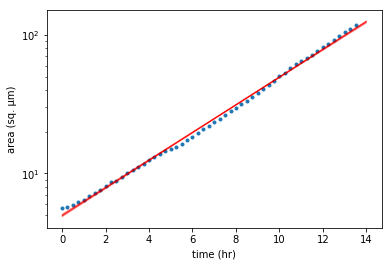

In [9]:
# Plot data points in a semilog-y plot with axis labeles
_ = plt.semilogy(t, bac_area, marker='.', linestyle='none')

# Generate x-values for the bootstrap lines: t_bs
t_bs = np.array([0, 14])

# Plot the first 100 bootstrap lines
for i in range(100):
    y = np.exp(growth_rate_bs_reps[i] * t_bs + log_a0_bs_reps[i])
    _ = plt.semilogy(t_bs, y, linewidth=0.5, alpha=0.05, color='red')
    
# Label axes and show plot
_ = plt.xlabel('time (hr)')
_ = plt.ylabel('area (sq. µm)')
plt.show()

Nicely done. You can see that the bootstrap replicates do not stray much. This is due to the exquisitly exponential nature of the bacterial growth under these experimental conditions.

## <font color=red>02 -  Analysis of results of the 2015 FINA World Swimming Championships </font> 
 In this chapter, you will practice your EDA, parameter estimation, and hypothesis testing skills on the results of the 2015 FINA World Swimming Championships. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Graphical EDA of men's 200 free heats</h1><p>In the heats, all contestants swim, the very fast and the very slow. To explore how the swim times are distributed, plot an ECDF of the men's 200 freestyle.</p></div></div></div>

In [10]:
fina_2015_df = pd.read_csv('./data/2015_FINA.csv', skiprows=4)
fina_2015_df.head()
mens_200_free_heats = fina_2015_df[(fina_2015_df['gender'] == 'M')& (fina_2015_df['stroke'] == 'FREE')& 
                                   (fina_2015_df['distance'] == 200) & (fina_2015_df['round'] == 'PRE')&
                                   (fina_2015_df['splitdistance'] == 200)]['swimtime'].values

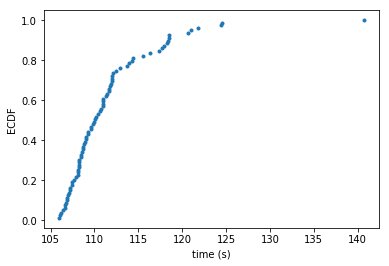

In [11]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(mens_200_free_heats)

# Plot the ECDF as dots
_ = plt.plot(x,y, marker = '.', linestyle="none")

# Label axes and show plot
plt.xlabel('time (s)')
plt.ylabel('ECDF')
plt.show()

Graphical EDA is always a great start. We see that fast swimmers are below 115 seconds, with a smattering of slow swimmers past that, including one very slow swimmer.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">200 m free time with confidence interval</h1><p>Now, you will practice parameter estimation and computation of confidence intervals by computing the mean and median swim time for the men's 200 freestyle heats. The median is useful because it is immune to heavy tails in the distribution of swim times, such as the slow swimmers in the heats. <code>mens_200_free_heats</code> is still in your namespace.</p></div></div></div>

In [12]:
# Compute mean and median swim times
mean_time = np.mean(mens_200_free_heats)
median_time = np.median(mens_200_free_heats)

# Draw 10,000 bootstrap replicates of the mean and median
bs_reps_mean = dcst.draw_bs_reps(mens_200_free_heats, np.mean, size = 10000)
bs_reps_median = dcst.draw_bs_reps(mens_200_free_heats, np.median, size = 10000)

# Compute the 95% confidence intervals
conf_int_mean = np.percentile(bs_reps_mean, [2.5, 97.5])
conf_int_median = np.percentile(bs_reps_median, [2.5, 97.5])

# Print the result to the screen
print("""
mean time: {0:.2f} sec.
95% conf int of mean: [{1:.2f}, {2:.2f}] sec.

median time: {3:.2f} sec.
95% conf int of median: [{4:.2f}, {5:.2f}] sec.
""".format(mean_time, *conf_int_mean, median_time, *conf_int_median))


mean time: 111.63 sec.
95% conf int of mean: [110.50, 112.91] sec.

median time: 110.04 sec.
95% conf int of median: [109.05, 111.29] sec.



Indeed, the mean swim time is longer than the median because of the effect of the very slow swimmers.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">EDA: finals versus semifinals</h1><p>First, you will get an understanding of how athletes' performance changes from the semifinals to the finals by computing the fractional improvement from the semifinals to finals and plotting an ECDF of all of these values.</p>
<p>The arrays <code>final_times</code> and <code>semi_times</code> contain the swim times of the respective rounds. The arrays are aligned such that <code>final_times[i]</code> and <code>semi_times[i]</code> are for the same swimmer/event. If you are interested in the strokes/events, you can check out the data frame <code>df</code> in your namespace, which has more detailed information, but is not used in the analysis.</p></div>

In [13]:
df_fina_short = fina_2015_df[(fina_2015_df['splitdistance'] == fina_2015_df['distance']) & 
                             (fina_2015_df['gender'] == 'F') & 
                             (fina_2015_df['round'] != 'PRE')&
                             (fina_2015_df['stroke'] != 'MEDLEY')
                            ][['athleteid', 'stroke', 'distance', 
                                                               'lastname', 'swimtime', 'round']]
df_compare = df_fina_short.pivot_table(index = ('athleteid', 'stroke','distance', 'lastname'), 
                                       columns = ('round'), 
                          values='swimtime')[['FIN', 'SEM']].dropna().reset_index()
final_times = df_compare.FIN.values
semi_times = df_compare.SEM.values

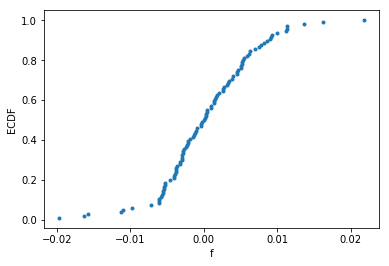

In [14]:
# Compute fractional difference in time between finals and semis
f = (semi_times - final_times) / semi_times

# Generate x and y values for the ECDF: x, y
x, y = dcst.ecdf(f)

# Make a plot of the ECDF
_ = plt.plot(x, y, marker = '.', linestyle = 'none')

# Label axes and show plot
_ = plt.xlabel('f')
_ = plt.ylabel('ECDF')
plt.show()

The median of the ECDF is juuuust above zero. But at first glance, it does not look like there is much of any difference between semifinals and finals. We'll check this carefully in the next exercises.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Parameter estimates of difference between finals and semifinals</h1><p>Compute the mean fractional improvement from the semifinals to finals, along with a 95% confidence interval of the mean. The Numpy array <code>f</code> that you computed in the last exercise is in your namespace.</p></div></div></div>

In [15]:
# Mean fractional time difference: f_mean
f_mean = np.mean(f)

# Get bootstrap reps of mean: bs_reps
bs_reps = dcst.draw_bs_reps(f, np.mean, size = 10000)

# Compute confidence intervals: conf_int
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Report
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]""".format(f_mean, *conf_int))


mean frac. diff.: 0.00040
95% conf int of mean frac. diff.: [-0.00093, 0.00175]


It looks like the mean finals time is juuuust faster than the mean semifinal time, and they very well may be the same. We'll test this hypothesis next.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">How to do the permutation test</h1><div><div><p>Based on our EDA and parameter estimates, it is tough to discern improvement from the semifinals to finals. In the next exercise, you will test the hypothesis that there is no difference in performance between the semifinals and finals. A permutation test is fitting for this. We will use the mean value of <em>f</em> as the test statistic. Which of the following simulates getting the test statistic under the null hypothesis?</p>
<ul>
<li>Strategy 1</li>
<li>Take an array of semifinal times and an array of final times for each swimmer for each stroke/distance pair. </li>
<li>Go through each array, and for each index, swap the entry in the respective final and semifinal array with a 50% probability.</li>
<li>Use the resulting final and semifinal arrays to compute <code>f</code> and then the mean of <code>f</code>.</li>
<li>Strategy 2</li>
<li>Take an array of semifinal times and an array of final times for each swimmer for each stroke/distance pair and concatenate them, giving a total of 96 entries. </li>
<li>Scramble the concatenated array using the <code>np.permutation()</code> function. Assign the first 48 entries in the scrambled array to be "semifinal" and the last 48 entries to be "final."</li>
<li>Compute <code>f</code> from these new semifinal and final arrays, and then compute the mean of <code>f</code>.</li>
<li>Strategy 3</li>
<li>Take the array <code>f</code> we used in the last exercise. </li>
<li>Multiply each entry of <code>f</code> by either <code>1</code> or <code>-1</code> with equal probability.</li>
<li>Compute the mean of this new array to get the test statistic.</li>
<li>Strategy 4</li>
<li>Define a function with signature <code>compute_f(semi_times, final_times)</code> to compute <code>f</code> from inputted swim time arrays.</li>
<li>Draw a permutation replicate using <code>dcst.draw_perm_reps(semi_times, final_times, compute_f)</code>.</li>
</ul></div></div></div>


Strategy 2 and 4 will not work because you are not maintaining the same swimmer for the semifinals and finals. This is actually the same procedure as choice (4).

<p>Strategy 3 does not work for the form of <em>f</em> that we have chosen. However, it would work if we had <em>f</em> = (semi time - final time) / (average of semi time and final time). But, we chose <em>f</em> to be a fractional <em>improvement</em>, not a fractional <em>difference</em>.</p>

**Strategy 1**

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Generating permutation samples</h1><p>As you worked out in the last exercise, we need to generate a permutation sample by randomly swapping corresponding entries in the <code>semi_times</code> and <code>final_times</code> array. Write a function with signature <code>swap_random(a, b)</code> that returns arrays where random indices have the entries in <code>a</code> and <code>b</code> swapped.</p></div>

In [16]:
np.random.random(size = 10) < 0.5

array([False, False,  True, False,  True,  True, False,  True, False,
       False])

In [17]:
def swap_random(a, b):
    """Randomly swap entries in two arrays."""
    # Indices to swap
    swap_inds = np.random.random(size = len(a)) < 0.5
    
    # Make copies of arrays a and b for output
    a_out = np.copy(a)
    b_out = np.copy(b)
    
    # Swap values
    a_out[swap_inds] = b[swap_inds]
    b_out[swap_inds] = a[swap_inds]

    return a_out, b_out

Now you have this function in hand to do the permutation test.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Hypothesis test: Do women swim the same way in semis and finals?</h1><p>Test the hypothesis that performance in the finals and semifinals are identical using the mean of the fractional improvement as your test statistic. The test statistic under the null hypothesis is considered to be at least as extreme as what was observed if it is greater than or equal to <code>f_mean</code>, which is already in your namespace.</p>
<p>The semifinal and final times are contained in the <code>numpy</code> arrays <code>semi_times</code> and <code>final_times</code>.</p></div></div></div>

In [18]:
# Set up array of permutation replicates
perm_reps = np.empty(1000)

for i in range(1000):
    # Generate a permutation sample
    semi_perm, final_perm = swap_random(semi_times, final_times)
    
    # Compute f from the permutation sample
    f = (semi_perm - final_perm) / semi_perm
    
    # Compute and store permutation replicate
    perm_reps[i] = np.mean(f)

# Compute and print p-value
print('p =', np.sum(perm_reps >= f_mean) / 1000)

p = 0.24


The p-value is large, about 0.27, which suggests that the results of the 2015 World Championships are consistent with there being no difference in performance between the finals and semifinals.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">EDA: Plot all your data</h1><p>To get a graphical overview of a data set, it is often useful to plot all of your data. In this exercise, plot all of the splits for all female swimmers in the 800 meter heats. The data are available in a Numpy arrays <code>split_number</code> and <code>splits</code>. The arrays are organized such that <code>splits[i,j]</code> is the split time for swimmer <code>i</code> for <code>split_number[j]</code>.</p></div>

In [19]:
women_800 = fina_2015_df[(fina_2015_df['gender'] == 'F')& (fina_2015_df['stroke'] == 'FREE')& 
                         (fina_2015_df['distance'] == 800) & (fina_2015_df['round'] == 'PRE')&
                         (fina_2015_df['split']> 2) & (fina_2015_df['split'] < 15).values
                        ]
splits = np.array(women_800.groupby('athleteid')['splitswimtime'].apply(list).values.tolist())
split_number = np.array(range(3,15))

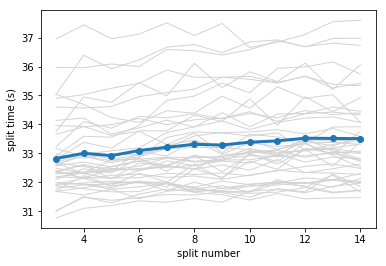

In [20]:
# Plot the splits for each swimmer
for split_time in splits:
    _ = plt.plot(split_number, split_time, linewidth=1, color='lightgray')

# Compute the mean split times
mean_splits = np.mean(splits, axis=0)

# Plot the mean split times
_ = plt.plot(split_number, mean_splits, marker = '.', linewidth=3, markersize=12)

# Label axes and show plot
_ = plt.xlabel('split number')
_ = plt.ylabel('split time (s)')
plt.show()

You can see that there is wide variability in the splits among the swimmers, and what appears to be a slight trend toward slower split times.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Linear regression of average split time</h1><p>We will assume that the swimmers slow down in a linear fashion over the course of the 800 m event. The slowdown per split is then the slope of the mean split time versus split number plot. Perform a linear regression to estimate the slowdown per split and compute a pairs bootstrap 95% confidence interval on the slowdown. Also show a plot of the best fit line.</p>
<p><em>Note</em>: We can compute error bars for the mean split times and use those in the regression analysis, but we will not take those into account here, as that is beyond the scope of this course.</p></div></div></div>

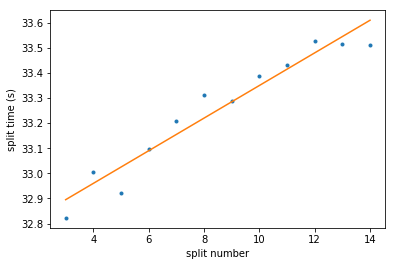


mean slowdown: 0.065 sec./split
95% conf int of mean slowdown: [0.052, 0.079] sec./split


In [21]:
# Perform regression
slowdown, split_3 = np.polyfit(split_number, mean_splits, 1)

# Compute pairs bootstrap
bs_reps, _ = dcst.draw_bs_pairs_linreg(split_number, mean_splits, size =10000)

# Compute confidence interval
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Plot the data with regressions line
_ = plt.plot(split_number, mean_splits, marker='.', linestyle='none')
_ = plt.plot(split_number, split_number * slowdown + split_3, '-')

# Label axes and show plot
_ = plt.xlabel('split number')
_ = plt.ylabel('split time (s)')
plt.show()

# Print the slowdown per split
print("""
mean slowdown: {0:.3f} sec./split
95% conf int of mean slowdown: [{1:.3f}, {2:.3f}] sec./split""".format(
    slowdown, *conf_int))


There is a small (about 6 hundreths of a second), but discernible, slowdown per split. We'll do a hypothesis test next.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Hypothesis test: are they slowing down?</h1><p>Now we will test the null hypothesis that the swimmer's split time is not at all correlated with the distance they are at in the swim. We will use the Pearson correlation coefficient (computed using <code>dcst.pearson_r()</code>) as the test statistic.</p></div>

In [22]:
# Observed correlation
rho = dcst.pearson_r(split_number, mean_splits)

# Initialize permutation reps
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the split number array
    scrambled_split_number = np.random.permutation(split_number)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_split_number, mean_splits)
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / len(perm_reps_rho)
print('p =', p_val)

p = 0.0


## <font color=red>03 -  The "Current Controversy" of the 2013 World Championships </font> 

<p class="chapter__description ">
    Some swimmers said that they felt it was easier to swim in one direction versus another in the 2013 World Championships. Some analysts have posited that there was a swirling current in the pool. In this chapter, you'll investigate this claim!
References - <a href="https://qz.com/761280/researchers-believe-certain-lanes-in-the-olympic-pool-may-have-given-some-swimmers-an-advantage/">Quartz Media</a>, <a href="https://www.washingtonpost.com/news/wonk/wp/2016/09/01/these-charts-clearly-show-how-some-olympic-swimmers-may-have-gotten-an-unfair-advantage/?utm_term=.dba907006ba1">Washington Post</a>, <a href="https://swimswam.com/rio-olympic-test-event-showed-same-pool-bias-2-0/">SwimSwam</a> (and also <a href="https://swimswam.com/problem-rio-pool/">here)</a>, and <a href="https://www.ncbi.nlm.nih.gov/pubmed/25003776">Cornett, et al</a>.
  </p>

The tiny effect is very real! With 10,000 replicates, we never got a correlation as big as observed under the hypothesis that the swimmers do not change speed as the race progresses. In fact, I did the test with a million replicates, and still never got a single replicate as big as the observed Pearson correlation coefficient.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">A metric for improvement</h1><p>In your first analysis, you will investigate how times of swimmers in 50 m events change as they move between low numbered lanes (1-3) to high numbered lanes (6-8) in the semifinals and finals. We showed in the previous chapter that there is little difference between semifinal and final performance, so you will neglect any differences due to it being the final versus the semifinal.</p>
<p>You want to use as much data as you can, so use all four strokes for both the men's and women's competitions. As such, what would be a good metric for improvement from one round to the next for an individual swimmer, where <em>t<sub>a</sub></em> is the swim time in a low numbered lane and <em>t<sub>b</sub></em> is the swim time in a high numbered lane?</p></div>

- <div >The difference swim times, <em>t<sub>a</sub></em> - <em>t<sub>b</sub></em>.</div>
- <div >The ratio of the swim times, <em>t<sub>a</sub></em> / <em>t<sub>b</sub></em>.</div>
- <div >The fractional improvement of swim time, (<em>t<sub>a</sub></em> - <em>t<sub>b</sub></em>) / <em>t<sub>a</sub></em>.</div>
- <div >The fractional difference of swim time, |<em>t<sub>a</sub></em> - <em>t<sub>b</sub></em>| / <em>t<sub>a</sub></em>.</div>


One of the metrics above is dependent on stroke or gender, which makes it undesirable, as different strokes are swum at different speeds by different genders. A ratio would be independent of stroke and gender, but it is not signed, and so not the best metric we could choose (though still totally fine).

**<div >The fractional improvement of swim time, (<em>t<sub>a</sub></em> - <em>t<sub>b</sub></em>) / <em>t<sub>a</sub></em>.</div>**
This is a good metric; it is the fractional improvement, and therefore independent of the basal speed (which is itself dependent on stroke and gender).


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">ECDF of improvement from low to high lanes</h1><p>Now that you have a metric for improvement going from low- to high-numbered lanes, plot an ECDF of this metric. I have put together the swim times of all swimmers who swam a 50 m semifinal in a high numbered lane and the final in a low numbered lane, and vice versa. The swim times are stored in the Numpy arrays <code>swimtime_high_lanes</code> and <code>swimtime_low_lanes</code>. Entry <code>i</code> in the respective arrays are for the same swimmer in the same event.</p></div>

In [23]:
swimtime_high_lanes = np.array([24.62, 22.9 , 27.05, 24.76, 30.31, 24.54, 26.12, 27.71, 23.15, 23.11, 21.62, 28.02, 24.73, 24.95, 25.83, 30.61, 27.04, 21.67, 27.16, 30.23, 21.51, 22.97, 28.05, 21.65, 24.54, 26.06])
swimtime_low_lanes = np.array([24.66, 23.28, 27.2 , 24.95, 32.34, 24.66, 26.17, 27.93, 23.35,22.93, 21.93, 28.33, 25.14, 25.19, 26.11, 31.31, 27.44, 21.85,27.48, 30.66, 21.74, 23.22, 27.93, 21.42, 24.79, 26.46])

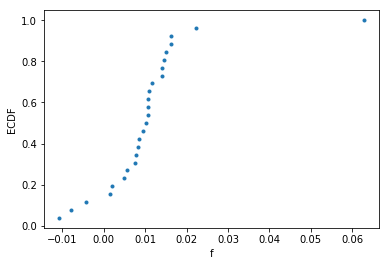

In [24]:
# Compute the fractional improvement of being in high lane: f
f = (swimtime_low_lanes - swimtime_high_lanes) / swimtime_low_lanes

# Make x and y values for ECDF: x, y
x, y = dcst.ecdf(f)

# Plot the ECDFs as dots
_ = plt.plot(x,y, marker = '.', linestyle='none')

# Label the axes and show the plot
_ = plt.xlabel('f')
_ = plt.ylabel('ECDF')
plt.show()

This is starting to paint a picture of lane bias. The ECDF demonstrates that all but three of the 26 swimmers swam faster in the high numbered lanes.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Estimation of mean improvement</h1><p>You will now estimate how big this current effect is. Compute the mean fractional improvement for being in a high-numbered lane versus a low-numbered lane, along with a 95% confidence interval of the mean.</p></div>

In [25]:
# Compute the mean difference: f_mean
f_mean = np.mean(f)

# Draw 10,000 bootstrap replicates: bs_reps
bs_reps = dcst.draw_bs_reps(f, np.mean, size = 10000)

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Print the result
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]""".format(f_mean, *conf_int))


mean frac. diff.: 0.01051
95% conf int of mean frac. diff.: [0.00623, 0.01574]


And it sure looks like swimmers are faster in lanes 6-8.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">How should we test the hypothesis?</h1><p>You are interested in the presence of lane bias toward higher lanes, presumably due to a slight current in the pool. A natural null hypothesis to test, then, is that the mean fractional improvement going from low to high lane numbers is zero.  Which of the following is a good way to simulate this null hypothesis?</p>
<p>As a reminder, the arrays <code>swimtime_low_lanes</code> and <code>swimtime_high_lanes</code> contain the swim times for lanes 1-3 and 6-8, respectively, and we define the fractional improvement as <code>f = (swimtime_low_lanes - swimtime_high_lanes) / swimtime_low_lanes</code>.</p></div>

1. Randomly swap <code>swimtime_low_lanes[i]</code> and <code>swimtime_high_lanes[i]</code> with probability 0.5. From these randomly swapped arrays, compute the fractional improvement. The test statistic is the mean of this new <code>f</code> array.

2. Scramble the entries in the <code>swimtime_high_lanes</code>, and recompute <code>f</code> from the scrambled array and the <code>swimtime_low_lanes</code> array. The test statistic is the mean of this new <code>f</code> array.

3. Shift the <code>swimtime_low_lanes</code> and <code>swimtime_high_lanes</code> arrays by adding a constant value to each so that the shifted arrays have the same mean. Compute the fractional improvement, <code>f_shift</code>, from these shifted arrays. Then, take a bootstrap replicate of the mean from <code>f_shift</code>.

4. Subtract the mean of <code>f</code> from <code>f</code> to generate <code>f_shift</code>. Then, take bootstrap replicate of the mean from this <code>f_shift</code>.

5. Either (3) or (4) will work; they are equivalent.</div></div></label></div></div></li></ul>

1 - This is simulating a different hypothesis, that whether a swimmer is in a high-numbered lane or a low-numbered lane has no bearing on the swim time. This is a perfectly reasonable hypothesis to test, but it is not the one we are testing here.

2 - If you scramble one of the arrays of swim times, you are then comparing a swim of a high lane number and a swim of a low lane number for a different swimmer for a different stroke.

3 - This is not correct, but the difference is subtle. If you do (3), you are simulating the hypothesis that averaging over all swimmers and strokes, the average swim time in high lanes is equal to that in low lanes. This is not the same as testing that the average <em>fractional</em> improvement is zero. We definitely want to test that the average fractional difference is zero because we want to normalize out differences in speed across strokes and gender.

** 4. Subtract the mean of <code>f</code> from <code>f</code> to generate <code>f_shift</code>. Then, take bootstrap replicate of the mean from this <code>f_shift</code>.**


Choice (1) is simulating a different hypothesis, that whether a swimmer is in a high-numbered lane or a low-numbered lane has no bearing on the swim time. This is a perfectly reasonable hypothesis to test, but it is not the one we are testing here. The other choices are not properly simulating a hypothesis we would be interested in.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Hypothesis test: Does lane assignment affect performance?</h1><p>Perform a bootstrap hypothesis test of the null hypothesis that the mean fractional improvement going from low-numbered lanes to high-numbered lanes is zero. Take the fractional improvement as your test statistic, and "at least as extreme as" to mean that the test statistic under the null hypothesis is greater than or equal to what was observed.</p></div>

In [26]:
# Shift f: f_shift
f_shift = f - f_mean

# Draw 100,000 bootstrap replicates of the mean: bs_reps
bs_reps = dcst.draw_bs_reps(f_shift, np.mean, size = 100000)

# Compute and report the p-value
p_val = sum(bs_reps >= f_mean) / 100000
print('p =', p_val)

p = 0.0003


A p-value of 0.0004 is quite small and suggests that the mean fractional improvment is greater than zero. For fun, I tested the more restrictive hypothesis that lane number has no bearing at all on performance (item (1) in the previous MCQ), and I got an even smaller p-value of about 0.00001. You can perform that test, too, for practice if you like.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Did the 2015 event have this problem?</h1><p>You would like to know if this is a typical problem with pools in competitive swimming. To address this question, perform a similar analysis for the results of the 2015 FINA World Championships. That is, compute the mean fractional improvement for going from lanes 1-3 to lanes 6-8 for the 2015 competition, along with a 95% confidence interval on the mean. Also test the hypothesis that the mean fractional improvement is zero.</p>
<p>The arrays <code>swimtime_low_lanes_15</code> and <code>swimtime_high_lanes_15</code> have the pertinent data.</p></div>

In [27]:
swimtime_low_lanes_15 = np.array([27.66, 24.69, 23.29, 23.05, 26.87, 31.03, 22.04, 24.51, 21.86,25.64, 25.91, 24.77, 30.14, 27.23, 24.31, 30.2 , 26.86])
swimtime_high_lanes_15 = np.array([27.7 , 24.64, 23.21, 23.09, 26.87, 30.74, 21.88, 24.5 , 21.86,25.9 , 26.2 , 24.73, 30.13, 26.92, 24.31, 30.25, 26.76])

In [28]:
# Compute f and its mean
f = (swimtime_low_lanes_15 - swimtime_high_lanes_15) / swimtime_low_lanes_15
f_mean = np.mean(f)

# Draw 10,000 bootstrap replicates
bs_reps = dcst.draw_bs_reps(f, np.mean, size = 10000)

# Compute 95% confidence interval
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Shift f
f_shift = f - f_mean

# Draw 100,000 bootstrap replicates of the mean
bs_reps = dcst.draw_bs_reps(f_shift, np.mean, size = 100000)

# Compute the p-value
p_val = sum(bs_reps >= f_mean) / 100000

# Print the results
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]
p-value: {3:.5f}""".format(f_mean, *conf_int, p_val))


mean frac. diff.: 0.00079
95% conf int of mean frac. diff.: [-0.00190, 0.00343]
p-value: 0.28083


Both the confidence interval an the p-value suggest that there was no lane bias in 2015.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Which splits should we consider?</h1><p>As you proceed to quantitatively analyze the zigzag effect in the 1500 m, which splits should you include in our analysis? For reference, the plot of the zigzag effect from the video is shown to the below.</p></div>

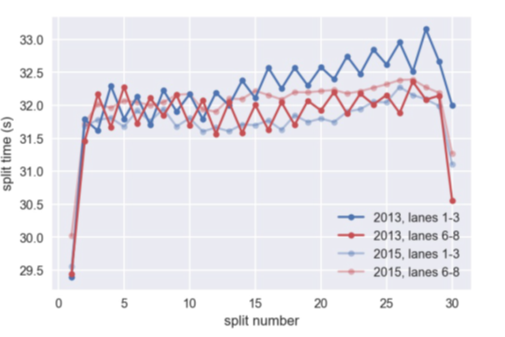

- You should include all splits, so as not to neglect useful data.
- You should only include even splits (100 m, 200 m, ...) because you can compare swimmers in lanes 1-3 going against the putative current and swimmers in lanes 6-8 going with the putative current.
- **You should include all splits except the first two and the last two. You should neglect the last two because swimmers stop pacing themselves and "kick" for the final stretch. The first two are different because they involve jumping off the starting blocks and more underwater swimming than others.**

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">EDA: mean differences between odd and even splits</h1><p>To investigate the differences between odd and even splits, you first need to define a difference metric. In previous exercises, you investigated the <em>improvement</em> of moving from a low-numbered lane to a high-numbered lane, defining <em>f</em> = (<em>t<sub>a</sub></em> - <em>t<sub>b</sub></em>) / <em>t<sub>a</sub></em>. There, the <em>t<sub>a</sub></em> in the denominator served as our reference time for improvement. Here, you are considering both improvement and decline in performance depending on the direction of swimming, so you want the reference to be an average. So, we will define the <strong>fractional difference</strong> as <em>f</em> = 2(<em>t<sub>a</sub></em> - <em>t<sub>b</sub></em>) / (<em>t<sub>a</sub></em> + <em>t<sub>b</sub></em>).</p>
<p>Your task here is to plot the mean fractional difference between odd and even splits versus lane number. I have already calculated the mean fractional differences for the 2013 and 2015 Worlds for you, and they are stored in <code>f_13</code> and <code>f_15</code>. The corresponding lane numbers are in the array <code>lanes</code>.</p></div>

In [29]:
f_13 = np.array([-0.01562214, -0.0146381 , -0.00977673, -0.00525713,  0.00204104, 0.00381014,  0.0075664 ,  0.01525869])
f_15 = np.array([-0.00516018, -0.00392952, -0.00099284,  0.00059953, -0.002424, -0.00451099,  0.00047467,  0.00081962])
lanes = np.array([1, 2, 3, 4, 5, 6, 7, 8])

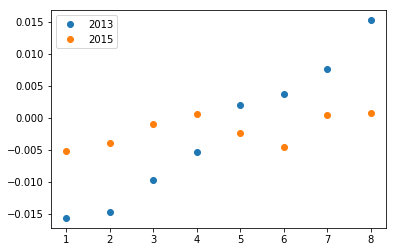

In [30]:
# Plot the the fractional difference for 2013 and 2015
_ = plt.plot(lanes, f_13, marker='.', markersize=12, linestyle='none')
_ = plt.plot(lanes, f_15, marker='.', markersize=12, linestyle='none')

# Add a legend
_ = plt.legend((2013, 2015))

# Label axes and show plot
plt.xlabel = 'lane'
plt.ylabel = 'frac. diff. (odd - even)'
plt.show()

EDA has exposed a strong slope in 2013 compared to 2015!

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">How does the current effect depend on lane position?</h1><p>To quantify the effect of lane number on performance, perform a linear regression on the <code>f_13</code> versus <code>lanes</code> data. Do a pairs bootstrap calculation to get a 95% confidence interval. Finally, make a plot of the regression. The arrays <code>lanes</code> and <code>f_13</code> are in your namespace.</p>
<p>Note that we could compute error bars on the mean fractional differences and use them in the regression, but that is beyond the scope of this course.</p></div>

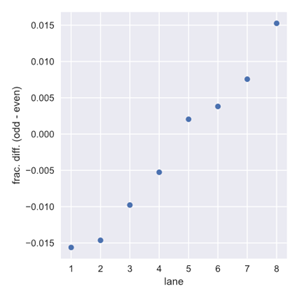

In [31]:
def b_value(mags, mt, perc=[2.5, 97.5], n_reps=None):
    """Compute the b-value and optionally its confidence interval."""
    # Extract magnitudes above completeness threshold: m
    m = mags[mags >= mt]

    # Compute b-value: b
    b = (np.mean(m) - mt) * np.log(10) 

    # Draw bootstrap replicates
    if n_reps is None:
        return b
    else:
        m_bs_reps = dcst.draw_bs_reps(m, np.mean, size=n_reps)

        # Compute b-value from replicates: b_bs_reps
        b_bs_reps = (m_bs_reps - mt) * np.log(10)

        # Compute confidence interval: conf_int
        conf_int = np.percentile(b_bs_reps, perc)
    
        return b, conf_int

The slope is a fractional difference of about 0.4% per lane. This is quite a substantial difference at this elite level of swimming where races can be decided by tiny differences.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Hypothesis test: can this be by chance?</h1><p>The EDA and linear regression analysis is pretty conclusive. Nonetheless, you will top off the analysis of the zigzag effect by testing the hypothesis that lane assignment has nothing to do with the mean fractional difference between even and odd lanes using a permutation test. You will use the Pearson correlation coefficient, which you can compute with <code>dcst.pearson_r()</code> as the test statistic. The variables <code>lanes</code> and <code>f_13</code> are already in your namespace.</p></div>

In [32]:
# Compute observed correlation: rho
rho = dcst.pearson_r(lanes, f_13)

# Initialize permutation reps: perm_reps_rho
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the lanes array: scrambled_lanes
    scrambled_lanes = np.random.permutation(lanes)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_lanes, f_13)
    
# Compute and print p-value
p_val = sum(perm_reps_rho >= rho) / 10000
print('p =', p_val)

p = 0.0


The p-value is very small, as you would expect from the confidence interval of the last exercise.

## <font color=red>04 -  Statistical seismology and the Parkfield region </font> 

 Herein, you'll use your statistical thinking skills to study the frequency and magnitudes of earthquakes. Along the way, you'll learn some basic statistical seismology, including the Gutenberg-Richter law. This exercise exposes two key ideas about data science: 1) As a data scientist, you wander into all sorts of domain specific analyses, which is very exciting. You constantly get to learn. 2) You are sometimes faced with limited data, which is also the case for many of these earthquake studies. You can still make good progress! 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Parkfield earthquake magnitudes</h1><p>As usual, you will start with EDA and plot the ECDF of the magnitudes of earthquakes detected in the Parkfield region from 1950 to 2016. The magnitudes of all earthquakes in the region from the ANSS ComCat are stored in the Numpy array <code>mags</code>.</p>
<p>When you do it this time, though, take a shortcut in generating the ECDF. You may recall that putting an asterisk before an argument in a function splits what follows into separate arguments. Since <code>dcst.ecdf()</code> returns two values, we can pass them as the <code>x</code>, <code>y</code> positional arguments to <code>plt.plot()</code> as <code>plt.plot(*dcst.ecdf(data_you_want_to_plot))</code>.</p>
<p>You will use this shortcut in this exercise and going forward.</p></div>

In [33]:
parkfield_earthquakes = pd.read_csv('./data/parkfield_earthquakes_1950-2017.csv', skiprows=2)
mags = parkfield_earthquakes['mag'].values 

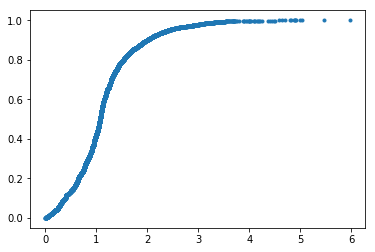

In [34]:
# Make the plot
_ = plt.plot(*dcst.ecdf(mags), marker = '.', linestyle = 'none')

# Label axes and show plot
plt.xlabel = 'magnitude'
plt.ylabel = 'ECDF'
plt.show()

Note the distinctive roll-off at magnitudes below 1.0.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Computing the b-value</h1><p>The <em>b</em>-value is a common metric for the seismicity of a region. You can imagine you would like to calculate it often when working with earthquake data. For tasks like this that you will do often, it is best to write a function! So, write a function with signature <code>b_value(mags, mt, perc=[2.5, 97.5], n_reps=None)</code> that returns the <em>b</em>-value and (optionally, if <code>n_reps</code> is not <code>None</code>) its confidence interval for a set of magnitudes, <code>mags</code>. The completeness threshold is given by <code>mt</code>. The <code>perc</code> keyword argument gives the percentiles for the lower and upper bounds of the confidence interval, and <code>n_reps</code> is the number of bootstrap replicates to use in computing the confidence interval.</p></div>

In [35]:
def b_value(mags, mt, perc=[2.5, 97.5], n_reps=None):
    """Compute the b-value and optionally its confidence interval."""
    # Extract magnitudes above completeness threshold: m
    m = mags[mags >= mt]

    # Compute b-value: b
    b = (np.mean(m) - mt) * np.log(10) 

    # Draw bootstrap replicates
    if n_reps is None:
        return b
    else:
        m_bs_reps = dcst.draw_bs_reps(m, np.mean, size=n_reps)

        # Compute b-value from replicates: b_bs_reps
        b_bs_reps = (m_bs_reps - mt) * np.log(10)

        # Compute confidence interval: conf_int
        conf_int = np.percentile(b_bs_reps, perc)
    
        return b, conf_int

You now have a very handy function for computing b-values. You'll use it in this and the next chapter.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">The b-value for Parkfield</h1><p>The ECDF is effective at exposing roll-off, as you could see below magnitude 1. Because there are plenty of earthquakes above magnitude 3, you can use <em>m<sub>t</sub> = 3</em> as your completeness threshold. With this completeness threshold, compute the <em>b</em>-value for the Parkfield region from 1950 to 2016, along with the 95% confidence interval. Print the results to the screen. The variable <code>mags</code> with all the magnitudes is in your namespace.</p>
<p>Overlay the theoretical Exponential CDF to verify that the Parkfield region follows the Gutenberg-Richter Law.</p></div>

In [36]:
mt = 3

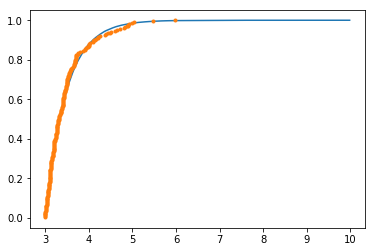


b-value: 1.08
95% conf int: [0.94, 1.24]


In [37]:
# Compute b-value and 95% confidence interval
b, conf_int = b_value(mags, 3, perc=[2.5, 97.5], n_reps=10000)

# Generate samples to for theoretical ECDF
m_theor = np.random.exponential(b/np.log(10), size=100000) + mt

# Plot the theoretical CDF
plt.plot(*dcst.ecdf(m_theor))

# Plot the ECDF (slicing mags >= mt)
plt.plot(*dcst.ecdf(mags[mags >= mt]), marker='.', linestyle='none')

# Pretty up and show the plot
plt.xlabel = 'magnitude'
plt.ylabel = 'ECDF'
plt.xlim = (2.8, 6.2)
plt.show()

# Report the results
print("""
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]""".format(b, *conf_int))

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Interearthquake time estimates for Parkfield</h1><p>In this exercise, you will first compute the best estimates for the parameters for the Exponential and Gaussian models for interearthquake times. You will then plot the theoretical CDFs for the respective models along with the formal ECDF of the actual Parkfield interearthquake times.</p></div>

In [38]:
time_gap = np.array([24.06570842, 20.07665982, 21.01848049, 12.24640657, 32.05475702,38.2532512 ])

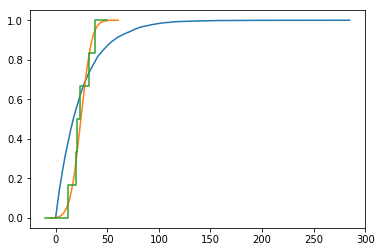

In [39]:
# Compute the mean time gap: mean_time_gap
mean_time_gap = np.mean(time_gap)

# Standard deviation of the time gap: std_time_gap
std_time_gap = np.std(time_gap)

# Generate theoretical Exponential distribution of timings: time_gap_exp
time_gap_exp = np.random.exponential(mean_time_gap, size = 10000)

# Generate theoretical Normal distribution of timings: time_gap_norm
time_gap_norm = np.random.normal(mean_time_gap, std_time_gap, size = 10000)

# Plot theoretical CDFs
_ = plt.plot(*dcst.ecdf(time_gap_exp))
_ = plt.plot(*dcst.ecdf(time_gap_norm))
_ = plt.plot(*dcst.ecdf(time_gap, formal=True, min_x=-10, max_x=50))
plt.show()

By eye, the Gaussian model seems to describe the observed data best. We will investigate the consequences of this in the next exercise, and see if we can reject the Exponential model in coming exercises.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">When will the next big Parkfield quake be?</h1><p>The last big earthquake in the Parkfield region was on the evening of September 27, 2004 local time. Your task is to get an estimate as to when the next Parkfield quake will be, assuming the Exponential model and also the Gaussian model. In both cases, the best estimate is given by the mean time gap, which you computed in the last exercise to be 24.62 years, meaning that the next earthquake would be in 2029. Compute 95% confidence intervals on when the next earthquake will be assuming an Exponential distribution parametrized by <code>mean_time_gap</code> you computed in the last exercise. Do the same assuming a Normal distribution parametrized by <code>mean_time_gap</code> and <code>std_time_gap</code>.</p></div>

In [40]:
import datetime
today = datetime.datetime.today()
today = today.year + ((today.month-1)/12) + ((today.day-1)/30)/12
last_quake = 2004.74

In [41]:
# Draw samples from the Exponential distribution: exp_samples
exp_samples = np.random.exponential(mean_time_gap, size = 100000)

# Draw samples from the Normal distribution: norm_samples
norm_samples = np.random.normal(mean_time_gap, std_time_gap,  size = 100000)

# No earthquake as of today, so only keep samples that are long enough
exp_samples = exp_samples[exp_samples > today - last_quake]
norm_samples = norm_samples[norm_samples > today - last_quake]

# Compute the confidence intervals with medians
conf_int_exp = np.percentile(exp_samples, [2.5, 50, 97.5]) + last_quake
conf_int_norm = np.percentile(norm_samples, [2.5, 50, 97.5]) + last_quake

# Print the results
print('Exponential:', conf_int_exp)
print('     Normal:', conf_int_norm)

Exponential: [2019.75516    2036.15647851 2109.82979351]
     Normal: [2020.0354527  2030.52970737 2046.3752238 ]


The models given decidedly different predictions. The Gaussian model says the next earthquake is almost sure to be in the next few decades, but the Exponential model says we may very well have to wait longer.

<h1 class="exercise--title">Computing the value of a formal ECDF</h1><p>To be able to do the Kolmogorov-Smirnov test, we need to compute the value of a formal ECDF at arbitrary points. In other words, we need a function, <code>ecdf_formal(x, data)</code> that returns the value of the formal ECDF derived from the data set <code>data</code> for each value in the array <code>x</code>. Two of the functions accomplish this. One will not. Of the two that do the calculation correctly, one is faster. Label each.</p>
<p>As a reminder, the ECDF is formally defined as ECDF(<em>x</em>) = (number of samples ≤ <em>x</em>) / (total number of samples). You also might want to check out the doc string of <code>np.searchsorted()</code>.</p>
</div></div></div></div></div>

a)
`def ecdf_formal(x, data):
    return np.searchsorted(np.sort(data), x) / len(data)`
    

b) 
`def ecdf_formal(x, data):
    return np.searchsorted(np.sort(data), x, side='right') / len(data)`

c) 

`def ecdf_formal(x, data): 
    output = np.empty(len(x))
    data = np.sort(data)
    for i, x_val in x:
        j = 0
        while j < len(data) and x_val >= data[j]:
            j += 1
        output[i] = j
    return output / len(data)`
    
**(a) Incorrect; (b) Correct, fast; (c) Correct, slow.**

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Computing the K-S statistic</h1><p>Write a function to compute the Kolmogorov-Smirnov statistic from two data sets, <code>data1</code> and <code>data2</code>. In practice using hacker stats, the second data set will be samples from the theoretical distribution you are comparing your data to. Conveniently, the function you just selected for computing values of the formal ECDF is given as <code>dcst.ecdf_formal()</code>.</p></div></div></div>

In [42]:
def ks_stat(data1, data2):
    # Compute ECDF from data: x, y
    x, y = dcst.ecdf(data1)
    
    # Compute corresponding values of the target CDF
    cdf = dcst.ecdf_formal(x, data2)

    # Compute distances between concave corners and CDF
    D_top = y - cdf

    # Compute distance between convex corners and CDF
    D_bottom = cdf - y + 1/len(data1)

    return np.max((D_top, D_bottom))

You now have another useful function in your tool box. We have kindly put it in the `dcst` module for your future use.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Drawing K-S replicates</h1><p>Now, you need a function to draw Kolmogorov-Smirnov replicates out of a target distribution, <code>f</code>. Construct a function with signature <code>draw_ks_reps(n, f, args=(), size=10000, n_reps=10000)</code> to do so. Here, <code>n</code> is the number of data points, and <code>f</code> is the function you will use to generate samples from the target CDF. For example, to test against an Exponential distribution, you would pass <code>np.random.exponential</code> as <code>f</code>. This function usually takes arguments, which must be passed as a tuple. So, if you wanted to take samples from an Exponential distribution with mean <code>x_mean</code>, you would use the <code>args=(x_mean,)</code> keyword. The keyword arguments <code>size</code> and <code>n_reps</code> respectively represent the number of samples to take from the target distribution and the number of replicates to draw.</p></div></div></div>

In [43]:
def draw_ks_reps(n, f, args=(), size=10000, n_reps=10000):
    # Generate samples from target distribution
    x_f = f(*args, size=size)
    
    # Initialize K-S replicates
    reps = np.empty(n_reps)
    
    # Draw replicates
    for i in range(n_reps):
        # Draw samples for comparison
        x_samp = f(*args, size=n)
        
        # Compute K-S statistic
        reps[i] = dcst.ks_stat(x_samp, x_f)

    return reps

<p>And now you have yet another valuable tool (which we have again conveniently put in <code>dcst.draw_ks_reps()</code>)! This will allow you to draw K-S replicates for use in K-S tests for arbitrary continuous distributions. You'll put it to use in the next exercise.</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">The K-S test for Exponentiality</h1><p>Test the null hypothesis that the interearthquake times of the Parkfield sequence are Exponentially distributed. That is, earthquakes happen at random with no memory of when the last one was. <em>Note</em>: This calculation is computationally intensive (you will draw more than 10<sup>8</sup> random numbers), so it will take about 10 seconds to complete.</p></div></div></div>

In [44]:
# Draw target distribution: x_f
x_f = np.random.exponential(mean_time_gap, size=10000)

# Compute K-S stat: d
d = dcst.ks_stat(time_gap, x_f)

# Draw K-S replicates: reps
reps = dcst.draw_ks_reps(len(time_gap), np.random.exponential, 
                         args=(mean_time_gap,), size=10000, n_reps=10000)

# Compute and print p-value
p_val = np.sum(reps >= d) / 10000
print('p =', p_val)

p = 0.2288


That's a p-value above 0.2. This means that the Parkfield sequence is not outside the realm of possibility if earthquakes there are a Poisson process. This does not mean that they are generated by a Poisson process, but that the observed sequence is not incongruous with that model. The upshot is that it is really hard to say when the next Parkfield quake will be.

## <font color=red>05 -  Earthquakes and oil mining in Oklahoma </font> 

 Of course, earthquakes have a big impact on society, and recently are connected to human activity. In this final chapter, you'll investigate the effect that increased injection of saline wastewater due to oil mining in Oklahoma has had on the seismicity of the region. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">EDA: Plotting earthquakes over time</h1><p>Make a plot where the <em>y</em>-axis is the magnitude and the <em>x</em>-axis is the time of all earthquakes in Oklahoma between 1980 and the first half of 2017. Each dot in the plot represents a single earthquake. The time of the earthquakes, as decimal years, is stored in the Numpy array <code>time</code>, and the magnitudes in the Numpy array <code>mags</code>.</p></div>

In [45]:
okl_eq = pd.read_csv('./data/oklahoma_earthquakes_1950-2017.csv', skiprows=2)
mags = okl_eq['mag'].values
okl_eq['year'] = pd.DatetimeIndex(okl_eq['time']).year
okl_eq['month'] = pd.DatetimeIndex(okl_eq['time']).month
okl_eq['day'] = pd.DatetimeIndex(okl_eq['time']).day
okl_eq['year_float'] = okl_eq.year + (okl_eq.month-1)/12 + (okl_eq.day/30)/12
time = okl_eq.year_float.values

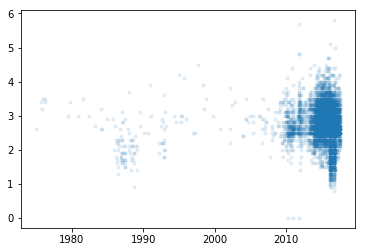

In [49]:
import matplotlib.pyplot as plt

# Plot time vs. magnitude
plt.plot(time, mags, marker = '.', linestyle='none', alpha=0.1)

# Label axes and show the plot
#_ = plt.xlabel ('time (year)')
#plt.ylabel('magnitude')
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Estimates of the mean interearthquake times</h1><p>The graphical EDA in the last exercise shows an obvious change in earthquake frequency around 2010. To compare, compute the mean time between earthquakes of magnitude 3 and larger from 1980 through 2009 and also from 2010 through mid-2017. Also include 95% confidence intervals of the mean. The variables <code>dt_pre</code> and <code>dt_post</code> respectively contain the time gap between all earthquakes of magnitude at least 3 from pre-2010 and post-2010 in units of days.</p></div>

In [60]:
dt= time[mags>=3]
dt = dt[dt<2010]
dt_list = [] 
for i in range(len(dt)-1):
    dt_list.append((dt[i+1]-dt[i])*365.6)
dt_pre = np.array(dt_list)

In [62]:
dt= time[mags>=3]
dt = dt[dt>=2010]
dt_list = [] 
for i in range(len(dt)-1):
    dt_list.append((dt[i+1]-dt[i])*365.6)
dt_post = np.array(dt_list)

In [66]:
# Compute mean interearthquake time
mean_dt_pre = np.mean(dt_pre)
mean_dt_post = np.mean(dt_post)

# Draw 10,000 bootstrap replicates of the mean
bs_reps_pre = dcst.draw_bs_reps(dt_pre, np.mean, size = 10000)
bs_reps_post = dcst.draw_bs_reps(dt_post, np.mean, size = 10000)


# Compute the confidence interval
conf_int_pre = np.percentile(bs_reps_pre, [2.5, 97.5])
conf_int_post = np.percentile(bs_reps_post, [2.5, 97.5])

# Print the results
print("""1980 through 2009
mean time gap: {0:.2f} days
95% conf int: [{1:.2f}, {2:.2f}] days""".format(mean_dt_pre, *conf_int_pre))

print("""
2010 through mid-2017
mean time gap: {0:.2f} days
95% conf int: [{1:.2f}, {2:.2f}] days""".format(mean_dt_post, *conf_int_post))

1980 through 2009
mean time gap: 212.35 days
95% conf int: [148.49, 284.13] days

2010 through mid-2017
mean time gap: 1.12 days
95% conf int: [0.97, 1.30] days


There is almost a 200-fold increase in earthquake frequency after 2010.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Hypothesis test: did earthquake frequency change?</h1><p>Obviously, there was a massive increase in earthquake frequency once wastewater injection began. Nonetheless, you will still do a hypothesis test for practice. You will not test the hypothesis that the interearthquake times have the same distribution before and after 2010, since wastewater injection may affect the distribution. Instead, you will assume that they have the same mean. So, compute the p-value associated with the hypothesis that the pre- and post-2010 interearthquake times have the same mean, using the mean of pre-2010 time gaps minus the mean of post-2010 time gaps as your test statistic.</p></div>

In [75]:
# Compute the observed test statistic
mean_dt_diff = mean_dt_pre - mean_dt_post

# Shift the post-2010 data to have the same mean as the pre-2010 data
dt_post_shift = dt_post - mean_dt_post + mean_dt_pre

# Compute 10,000 bootstrap replicates from arrays
bs_reps_pre = dcst.draw_bs_reps(dt_pre, np.mean, size = 10000)
bs_reps_post = dcst.draw_bs_reps(dt_post_shift, np.mean, size = 10000)

# Get replicates of difference of means
bs_reps = bs_reps_pre - bs_reps_post

# Compute and print the p-value
p_val = np.sum(bs_reps >= mean_dt_diff) / 10000
print('p =', p_val)

p = 0.0


In 10,000 samples, not one had a test statistic greater than was was observed. The p-value is, predictably based on what we have done so far, is tiiiiiny!

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">How to display your analysis</h1><p>In the last three exercises, you generated a plot, computed means/confidence intervals, and did a hypothesis test. If you were to present your results to others, which of the following is the most effective order of emphasis, from greatest-to-least, you should put on the respective results?</p></div>

**plot, mean/confidence interval, hypothesis test**

The plot graphically shows all data, and the scale of the effect is evident. The mean and confidence interval quantify how big the effect is. The hypothesis test, by this point, is so obvious it is useless.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">EDA: Comparing magnitudes before and after 2010</h1><p>Make an ECDF of earthquake magnitudes from 1980 through 2009. On the same plot, show an ECDF of magnitudes of earthquakes from 2010 through mid-2017. The time of the earthquakes, as decimal years, are stored in the Numpy array <code>time</code> and the magnitudes in the Numpy array <code>mags</code>.</p></div>

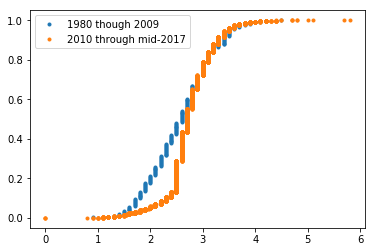

In [77]:
# Get magnitudes before and after 2010
mags_pre = mags[time < 2010]
mags_post = mags[time >= 2010]

# Generate ECDFs
_ = plt.plot(*dcst.ecdf(mags_pre), marker='.', linestyle='none')
_ = plt.plot(*dcst.ecdf(mags_post), marker='.', linestyle='none')

# Label axes and show plot
#_ = plt.xlabel('magnitude')
#_ = plt.ylabel('ECDF')
plt.legend(('1980 though 2009', '2010 through mid-2017'), loc='upper left')
plt.show()

Both curves seem to follow the Gutenberg-Richter Law, but with different completeness thresholds, probably due to improvements in sensing capabilities in more recent years.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Quantification of the b-values</h1><p>Based on the plot you generated in the previous exercise, you can safely use a completeness threshold of <code>mt = 3</code>. Using this threshold, compute <em>b</em>-values for the period between 1980 and 2009 and for 2010 through mid-2017. The function <code>b_value()</code> you wrote last chapter, which computes the <em>b</em>-value and confidence interval from a set of magnitudes and completeness threshold, is available in your namespace, as are the <code>numpy</code> arrays <code>mags_pre</code> and <code>mags_post</code> from the last exercise, and <code>mt</code>.</p></div>

In [78]:
# Compute b-value and confidence interval for pre-2010
b_pre, conf_int_pre = b_value(mags_pre, mt, perc=[2.5, 97.5], n_reps=10000)

# Compute b-value and confidence interval for post-2010
b_post, conf_int_post = b_value(mags_post, mt, perc=[2.5, 97.5], n_reps=10000)

# Report the results
print("""
1980 through 2009
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]

2010 through mid-2017
b-value: {3:.2f}
95% conf int: [{4:.2f}, {5:.2f}]
""".format(b_pre, *conf_int_pre, b_post, *conf_int_post))


1980 through 2009
b-value: 0.75
95% conf int: [0.56, 0.95]

2010 through mid-2017
b-value: 0.62
95% conf int: [0.60, 0.65]



The confidence interval for the b-value for recent earthquakes is tighter than for earlier ones because there are many more recent ones. Still, the confidence intervals overlap, and we can perform a hypothesis test to see if we might get these results if the b-values are actually the same.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">How should we do a hypothesis test on differences of the b-value?</h1><p>We wish to test the hypothesis that the <em>b</em>-value in Oklahoma from 1980 through 2009 is the same as that from 2010 through mid-2017. Which of the first five statements is false? If none of them are false, select the last choice.</p></div>

- You should only include earthquakes that have magnitudes above the completeness threshold. A value of 3 is reasonable.
- You should perform a permutation test because asserting a null hypothesis that the b-values are the same implicitly assumes that the magnitudes are identically distributed, specifically Exponentially, by the Gutenberg-Richter Law.
- A reasonable test statistic is the difference between the mean post-2010 magnitude and the mean pre-2010 magnitude.
- You do not need to worry about the fact that there were far fewer earthquakes before 2010 than there were after. That is to say, there are fewer earthquakes before 2010, but sufficiently many to do a permutation test.
- You do not need to worry about the fact that the two time intervals are of different length.

For instructional purposes, here are reasons why each is true: Option 1 is true because below the completeness threshold, we are not comparing earthquakes before and after 2010, but observed earthquakes before and after 2010. We do not have a complete data set below the completeness threshold. Option 2 is true because we really are assuming the Gutenberg-Richter law holds, in part because we are only considering earthquakes above the completeness threshold. We are using a model (the G-R law) to deal with missing data. So, since both sets of quakes follow the same statistical model, and that model has a single parameter, a permutation test is appropriate. Option 3 is true, even though you may be thinking that the mean values are not the b-values, and that you should be using the difference in b-value as your test statistic. However, the difference in mean magnitude is directly proportional to the difference in b-value, so the result of the hypothesis test will be identical if we use b-values of mean magnitudes. Option 4 is true because even though they have different numbers of earthquakes, you are only interested in summary statistics about their magnitude. There were 53 earthquakes between 1980 and 2009 with magnitude 3 or greater, so we have enough to compute a reliable mean. Option 5 is true because, provided the time interval is long enough, the b-value is independent of the time interval, just like the mean of Exponentially distributed values is independent of how many there are, provided there are not too few.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Hypothesis test: are the b-values different?</h1><p>Perform the hypothesis test sketched out on the previous exercise. The variables <code>mags_pre</code> and <code>mags_post</code> are already loaded into your namespace, as is <code>mt = 3</code>.</p></div>

In [79]:
# Only magnitudes above completeness threshold
mags_pre = mags_pre[mags_pre >= mt]
mags_post = mags_post[mags_post >= mt]

# Observed difference in mean magnitudes: diff_obs
diff_obs = np.mean(mags_post) - np.mean(mags_pre)

# Generate permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(mags_post, mags_pre, dcst.diff_of_means, size=10000)

# Compute and print p-value
p_val = np.sum(perm_reps < diff_obs) / 10000
print('p =', p_val)

p = 0.0861


A p-value around 0.1 suggests that the observed magnitudes are commensurate with there being no change in b-value after wastewater injection began.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">What can you conclude from this analysis?</h1><p>All but one of the following constitute reasonable conclusions from our analysis of earthquakes. Which one does not?</p></div>

- The seismicity, as measured by the b-value, is comparable before and after wastewater injection.
- Earthquakes are over 100 times more frequent in Oklahoma after widespread wastewater injection began.
- **Oklahoma has a smaller b-value than the Parkfield region, so the Parkfield region has more earthquakes.**
- Oklahoma has a b-value smaller than the Parkfield region, so a randomly selected earthquake above magnitude 3 in Oklahoma more likely than not has a smaller magnitude than one above magnitude 3 randomly selected from the Parkfield region.

```
Parkfield 1950 through 2009
b-value: 1.08
95% conf int: [0.94, 1.23]


Oklahoma 1980 through 2009
b-value: 0.74
95% conf int: [0.54, 0.97]

mean time gap: 204.61 days
95% conf int: [138.45, 276.83] days


Oklahoma 2010 through mid-2017
b-value: 0.62
95% conf int: [0.60, 0.65]

mean time gap: 1.12 days
95% conf int: [0.97, 1.30] days


Oklahoma: p-value for difference in b-value : 0.10
```

One cannot conclude information about frequency of earthquakes from the b-value alone. It is also true that from 2010-mid 2017, Oklahoma had twice as many earthquakes of magnitude 3 and higher than the entire state of California!